In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# Accuracy check library
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix  
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# preprocessing libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [ ]:
# ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [ ]:
#report 
from sklearn.metrics import classification_report

# Reading the dataset from the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ml

/content/drive/MyDrive/ml


In [ ]:
%ls

 2147227_Knn_naive_kmean.ipynb   Folds5x2_pp.ods         processed_scaler.csv
'23_July_22_lab2 (1).ipynb'      HCV.csv                 Readme.txt
 23_July_22_lab2.ipynb           hcvdat0.csv             Readme.txt~
 CCPP/                          'Lab (2).ipynb'          reg.csv
 Folds5x2_pp.csv                 processed_min_max.csv   supermarket.csv


# Doing basic data exploratory

In [ ]:
df = pd.read_csv('supermarket.csv')

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
df.shape

(1000, 17)

# Convert catogorical data to numerical data
# return: dataset
# parameter: dataset
**Also checks to replace only non numerical one**

In [ ]:
def convertCatNum(dataset):
  le = preprocessing.LabelEncoder()
  notCol = df._get_numeric_data().columns
  for col in df.columns:
    if col not in notCol:
      dataset[col]=le.fit_transform(dataset[col]) 
  return dataset

# Remove null values and replace it with median of the columns
# return: The dataset
# parameters: The dataset and null column numbers

In [ ]:
def remNull(dataset, nullcol):
    imputer = SimpleImputer(missing_values=np.nan,strategy="median")
    imputer.fit(dataset.iloc[:,nullcol])
    dataset.iloc[:,nullcol]=imputer.transform(dataset.iloc[:,nullcol])
    print("Checking null value:\n")
    print(dataset.isnull().sum())
    print("\n\n")
    return dataset

# normalise and split the dataset into train and test
# parameters: dataset, features in array
# return: x_train, x_test, y_train, y_test
**remember select the feature**

In [ ]:
def splitter(dataset, colsx, colsy):
  # X=dataset.iloc[:,2:].values
  # y=dataset.iloc[:,1].values
  X = dataset[[*colsx]].values
  y = dataset[[*colsy]].values
  SD=StandardScaler()
  X=SD.fit_transform(X)
  #y=np.column_stack(SD.fit_transform(y))
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)
  return X_train, X_test, y_train, y_test

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# cleaning the dataset

In [ ]:
df.drop( "Tax 5%",axis = 1, inplace=True)
df.drop( "Time",axis = 1, inplace=True)
df.drop( "Date",axis = 1, inplace=True)
df.drop( "Invoice ID",axis = 1, inplace=True)
#Tax 5%   Time    Date    Invoice ID

In [ ]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df = convertCatNum(df.copy())

In [ ]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0,0,3,74.69,7,548.9715,2,522.83,4.761905,26.1415,9.1
1,2,1,1,0,0,15.28,5,80.2200,0,76.40,4.761905,3.8200,9.6
2,0,2,1,1,4,46.33,7,340.5255,1,324.31,4.761905,16.2155,7.4
3,0,2,0,1,3,58.22,8,489.0480,2,465.76,4.761905,23.2880,8.4
4,0,2,1,1,5,86.31,7,634.3785,2,604.17,4.761905,30.2085,5.3


# remove null value and replace it with median of the column

In [ ]:
df.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
# The array contains the column numbers that have null values
df = remNull(df.copy(), [2,3,4,5,6,8,11])

Checking null value:

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64





In [ ]:
df.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0.0,0.0,3.0,74.69,7.0,548.9715,2.0,522.83,4.761905,26.1415,9.1
1,2,1,1.0,0.0,0.0,15.28,5.0,80.2200,0.0,76.40,4.761905,3.8200,9.6
2,0,2,1.0,1.0,4.0,46.33,7.0,340.5255,1.0,324.31,4.761905,16.2155,7.4
3,0,2,0.0,1.0,3.0,58.22,8.0,489.0480,2.0,465.76,4.761905,23.2880,8.4
4,0,2,1.0,1.0,5.0,86.31,7.0,634.3785,2.0,604.17,4.761905,30.2085,5.3


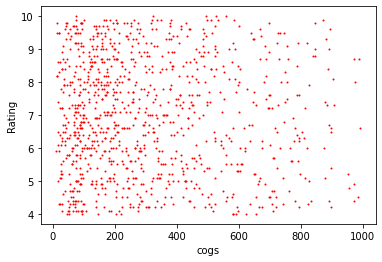

In [ ]:
df.plot.scatter(x = 'cogs', y = 'Rating', s = 1, c='red')

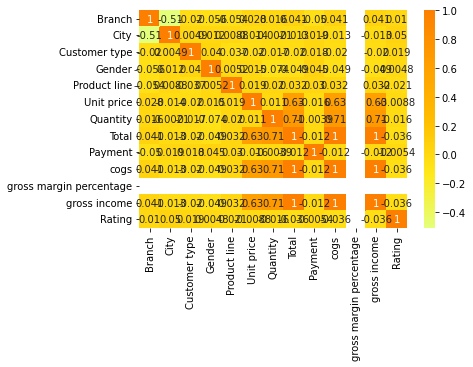

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

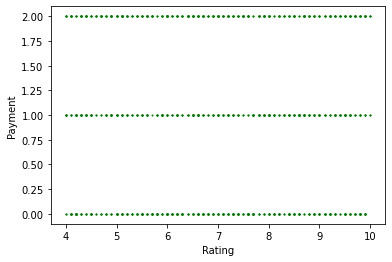

In [ ]:
df.plot.scatter(x = 'Rating', y = 'Payment', s = 1, c='green')

# MLP

# 2nd data processing

In [ ]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Total', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [ ]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0.0,0.0,3.0,74.69,7.0,548.9715,2.0,522.83,4.761905,26.1415,9.1
1,2,1,1.0,0.0,0.0,15.28,5.0,80.2200,0.0,76.40,4.761905,3.8200,9.6
2,0,2,1.0,1.0,4.0,46.33,7.0,340.5255,1.0,324.31,4.761905,16.2155,7.4
3,0,2,0.0,1.0,3.0,58.22,8.0,489.0480,2.0,465.76,4.761905,23.2880,8.4
4,0,2,1.0,1.0,5.0,86.31,7.0,634.3785,2.0,604.17,4.761905,30.2085,5.3


In [ ]:
x_train, x_test, y_train, y_test = splitter(df, ['Branch', 'City', 'Rating', 'Product line', 'Total' ], ['Gender'])

In [ ]:
sc=StandardScaler()
scaler = sc.fit(x_train)
trainX_scaled = scaler.transform(x_train)
testX_scaled = scaler.transform(x_test)

In [ ]:

clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
clf.predict_proba(x_test)
clf.score(x_test, y_test)

0.48

In [ ]:
score_mlp = clf.score(x_test, y_test)

In [ ]:
pred = clf.score(x_train,y_train)
pred

0.62125

# Differnt Activation function's accuracy score

In [ ]:
activationList = ["relu", "identity", "logistic", "tanh"]
for i in range(0,4):
  clf = MLPClassifier(activation = activationList[i]);
  clf.fit(x_train, y_train);
  tempscore = clf.score(x_train, y_train)
  print("Activation function -",activationList[i],"- Accuracy : ",tempscore)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Activation function - relu - Accuracy :  0.6125
Activation function - identity - Accuracy :  0.55125
Activation function - logistic - Accuracy :  0.54625


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation function - tanh - Accuracy :  0.54875


**Inference:** *We can see that the Activation function: relu has more Accuracy Score compared to others*

In [ ]:
y_pred = clf.predict(testX_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.51


In [ ]:


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[43 57]
 [41 59]]


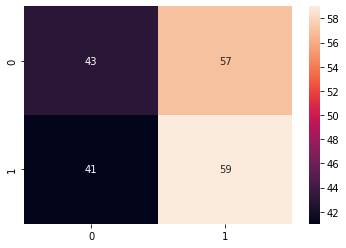

In [ ]:
sns.heatmap(cf_matrix, annot=True)

# ploting the TP and FP of x_train and y_train

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


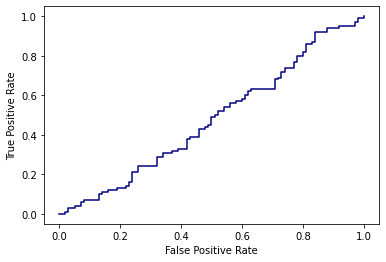

In [ ]:

mlp = MLPClassifier()
mlp.fit(x_train,y_train)
y_pred_proba = mlp.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=0)
plt.plot(fpr,tpr ,color="navy")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ploting the TP and FP of x_test and y_test

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


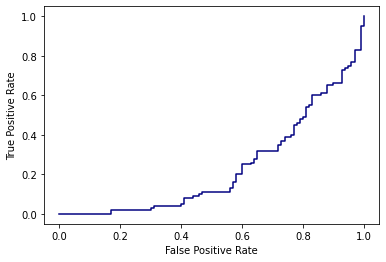

In [ ]:

mlp = MLPClassifier()
mlp.fit(x_test,y_test)
y_pred_proba = mlp.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=0)
plt.plot(fpr,tpr ,color="navy")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = mlp.predict(testX_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67       100
         1.0       0.67      0.72      0.70       100

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.68       200



In [ ]:
activationList = ["relu", "identity", "logistic", "tanh"]
for i in range(0,4):
  clf = MLPClassifier(activation = activationList[i], hidden_layer_sizes=(3),random_state=42);
  clf.fit(x_train, y_train);
  tempscore = clf.score(x_train, y_train)
  print("Activation function -",activationList[i],"- Accuracy : ",tempscore)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Activation function - relu - Accuracy :  0.5125
Activation function - identity - Accuracy :  0.53875
Activation function - logistic - Accuracy :  0.51
Activation function - tanh - Accuracy :  0.525


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
activationList = ["relu", "identity", "logistic", "tanh"]
for i in range(0,4):
  clf = MLPClassifier(activation = activationList[i], hidden_layer_sizes=(6),random_state=42);
  clf.fit(x_train, y_train);
  tempscore = clf.score(x_train, y_train)
  print("Activation function -",activationList[i],"- Accuracy : ",tempscore)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation function - relu - Accuracy :  0.52875
Activation function - identity - Accuracy :  0.54625


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation function - logistic - Accuracy :  0.52
Activation function - tanh - Accuracy :  0.53875


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
activationList = ["relu", "identity", "logistic", "tanh"]
for i in range(0,4):
  clf = MLPClassifier(activation = activationList[i], hidden_layer_sizes=(5),random_state=42);
  clf.fit(x_train, y_train);
  tempscore = clf.score(x_train, y_train)
  print("Activation function -",activationList[i],"- Accuracy : ",tempscore)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation function - relu - Accuracy :  0.54


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation function - identity - Accuracy :  0.53125
Activation function - logistic - Accuracy :  0.5175


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Activation function - tanh - Accuracy :  0.5175
